In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [364]:
df=pd.read_csv('data/df.csv')
df.head()

,name,city,salary_from,salary_to,salary_currency,salary_is_gross,experience,schedule,employment_type,employer_name,employer_is_trusted,"specialization_CTO, CIO, Директор по IT","specialization_FMCG, Товары народного потребления","specialization_PR, Маркетинговые коммуникации",specialization_Web инженер,specialization_Web мастер,specialization_Администратор баз данных,specialization_Аналитик,specialization_Арт директор,specialization_Арт-директор,specialization_Аудит,specialization_Ввод данных,specialization_Гуманитарные науки,specialization_Делопроизводство,"specialization_Дизайн, графика, живопись",specialization_Дизайн/Оформление,specialization_Другое,specialization_Закупки и снабжение,"specialization_Закупки, Снабжение",specialization_Инженер,specialization_Инсталляция и настройка оборудования,specialization_Интернет,specialization_Информационные технологии,"specialization_Информационные технологии, Интернет, Мультимедиа",specialization_Коммерческий банк,specialization_Компьютерная безопасность,specialization_Конструктор,specialization_Контроль качества,specialization_Кредитование малого и среднего бизнеса,specialization_Лаборант,specialization_Машиностроение,specialization_Менеджер по работе с клиентами,specialization_Метролог,specialization_Наладчик,specialization_Наружная реклама,"specialization_Начальный уровень, Мало опыта",specialization_Оператор станков,specialization_Оптовая торговля,specialization_Первичная документация,specialization_Печатная реклама,specialization_Пищевая промышленность,"specialization_Планирование, Размещение рекламы","specialization_Поддержка, Helpdesk",specialization_Преподавание,"specialization_Программирование, Разработка",specialization_Продажи,"specialization_Продвижение, Специальные мероприятия",specialization_Продукты питания,"specialization_Проектирование, Архитектура",specialization_Прямые продажи,specialization_Ресепшен,specialization_Риски: кредитные,specialization_Розничная торговля,specialization_Секретарь,specialization_Сервисный инженер,specialization_Сертификация,specialization_Сетевые технологии,specialization_Системная интеграция,specialization_Системный администратор,specialization_Системы управления предприятием (ERP),specialization_Складское хозяйство,specialization_Стартапы,specialization_Строительство,specialization_Тестирование,specialization_Технический писатель,specialization_Технолог,"specialization_Технолог, Мясо- и птицепереработка","specialization_Технолог, Производство и переработка зерновых","specialization_Технолог, Производство сахара",specialization_Управление закупками,specialization_Управление продажами,specialization_Управление проектами,specialization_Управляющий офисом (Оffice manager),specialization_Химическая промышленность,specialization_Эксплуатация,specialization_Языки,"role_BI-аналитик, аналитик данных",role_Аналитик,"role_Арт-директор, креативный директор",role_Архитектор,role_Аудитор,role_Директор по информационным технологиям (CIO),role_Директор по персоналу (HRD),role_Другое,role_Инженер ПНР,role_Инженер по эксплуатации,"role_Инженер-конструктор, инженер-проектировщик","role_Инженер-электроник, инженер-электронщик",role_Коммерческий директор (CCO),role_Менеджер по закупкам,"role_Менеджер по маркетингу, интернет-маркетолог","role_Менеджер по продажам, менеджер по работе с клиентами",role_Метролог,"role_Научный специалист, исследователь","role_Оператор ПК, оператор базы данных",role_Оператор станков с ЧПУ,role_Операционный директор (COO),role_Офис-менеджер,"role_Программист, разработчик",role_Продуктовый аналитик,role_Руководитель группы разработки,role_Руководитель отдела маркетинга и рекламы,role_Руководитель проектов,role_Системный администратор,role_Системный аналитик,role_Системный инженер,role_Специалист по информационной безопасности,role_Специалист по сертификации,role_Специалист технической поддержки,role_Тестировщик,role_Технический писатель,role_Технолог,"role_Учитель, преподаватель, педагог",skill_.net,skill_18.10.20,skill_1c,skill_2d,

Поскольку часть зарпалыт гросс, а часть нет, приведем для сравнения все в чситую зарплату, отминусов 13% НДФЛ.

In [370]:
df['net_sal'] = df[["salary_from", "salary_is_gross"]].apply(lambda x: x["salary_from"]*0.87 if x["salary_is_gross"]==True else x["salary_from"], axis=1)
df.head(5)

,name,city,salary_from,salary_to,salary_currency,salary_is_gross,experience,schedule,employment_type,employer_name,employer_is_trusted,"specialization_CTO, CIO, Директор по IT","specialization_FMCG, Товары народного потребления","specialization_PR, Маркетинговые коммуникации",specialization_Web инженер,specialization_Web мастер,specialization_Администратор баз данных,specialization_Аналитик,specialization_Арт директор,specialization_Арт-директор,specialization_Аудит,specialization_Ввод данных,specialization_Гуманитарные науки,specialization_Делопроизводство,"specialization_Дизайн, графика, живопись",specialization_Дизайн/Оформление,specialization_Другое,specialization_Закупки и снабжение,"specialization_Закупки, Снабжение",specialization_Инженер,specialization_Инсталляция и настройка оборудования,specialization_Интернет,specialization_Информационные технологии,"specialization_Информационные технологии, Интернет, Мультимедиа",specialization_Коммерческий банк,specialization_Компьютерная безопасность,specialization_Конструктор,specialization_Контроль качества,specialization_Кредитование малого и среднего бизнеса,specialization_Лаборант,specialization_Машиностроение,specialization_Менеджер по работе с клиентами,specialization_Метролог,specialization_Наладчик,specialization_Наружная реклама,"specialization_Начальный уровень, Мало опыта",specialization_Оператор станков,specialization_Оптовая торговля,specialization_Первичная документация,specialization_Печатная реклама,specialization_Пищевая промышленность,"specialization_Планирование, Размещение рекламы","specialization_Поддержка, Helpdesk",specialization_Преподавание,"specialization_Программирование, Разработка",specialization_Продажи,"specialization_Продвижение, Специальные мероприятия",specialization_Продукты питания,"specialization_Проектирование, Архитектура",specialization_Прямые продажи,specialization_Ресепшен,specialization_Риски: кредитные,specialization_Розничная торговля,specialization_Секретарь,specialization_Сервисный инженер,specialization_Сертификация,specialization_Сетевые технологии,specialization_Системная интеграция,specialization_Системный администратор,specialization_Системы управления предприятием (ERP),specialization_Складское хозяйство,specialization_Стартапы,specialization_Строительство,specialization_Тестирование,specialization_Технический писатель,specialization_Технолог,"specialization_Технолог, Мясо- и птицепереработка","specialization_Технолог, Производство и переработка зерновых","specialization_Технолог, Производство сахара",specialization_Управление закупками,specialization_Управление продажами,specialization_Управление проектами,specialization_Управляющий офисом (Оffice manager),specialization_Химическая промышленность,specialization_Эксплуатация,specialization_Языки,"role_BI-аналитик, аналитик данных",role_Аналитик,"role_Арт-директор, креативный директор",role_Архитектор,role_Аудитор,role_Директор по информационным технологиям (CIO),role_Директор по персоналу (HRD),role_Другое,role_Инженер ПНР,role_Инженер по эксплуатации,"role_Инженер-конструктор, инженер-проектировщик","role_Инженер-электроник, инженер-электронщик",role_Коммерческий директор (CCO),role_Менеджер по закупкам,"role_Менеджер по маркетингу, интернет-маркетолог","role_Менеджер по продажам, менеджер по работе с клиентами",role_Метролог,"role_Научный специалист, исследователь","role_Оператор ПК, оператор базы данных",role_Оператор станков с ЧПУ,role_Операционный директор (COO),role_Офис-менеджер,"role_Программист, разработчик",role_Продуктовый аналитик,role_Руководитель группы разработки,role_Руководитель отдела маркетинга и рекламы,role_Руководитель проектов,role_Системный администратор,role_Системный аналитик,role_Системный инженер,role_Специалист по информационной безопасности,role_Специалист по сертификации,role_Специалист технической поддержки,role_Тестировщик,role_Технический писатель,role_Технолог,"role_Учитель, преподаватель, педагог",skill_.net,skill_18.10.20,skill_1c,skill_2d,

In [371]:
nets = df['net_sal']
df.drop(labels=['net_sal'], axis=1,inplace = True)
df.insert(6, 'net_sal', nets)
df.drop(labels=['salary_to'], axis=1,inplace = True)
df.head(2)

,name,city,salary_from,salary_currency,salary_is_gross,net_sal,experience,schedule,employment_type,employer_name,employer_is_trusted,"specialization_CTO, CIO, Директор по IT","specialization_FMCG, Товары народного потребления","specialization_PR, Маркетинговые коммуникации",specialization_Web инженер,specialization_Web мастер,specialization_Администратор баз данных,specialization_Аналитик,specialization_Арт директор,specialization_Арт-директор,specialization_Аудит,specialization_Ввод данных,specialization_Гуманитарные науки,specialization_Делопроизводство,"specialization_Дизайн, графика, живопись",specialization_Дизайн/Оформление,specialization_Другое,specialization_Закупки и снабжение,"specialization_Закупки, Снабжение",specialization_Инженер,specialization_Инсталляция и настройка оборудования,specialization_Интернет,specialization_Информационные технологии,"specialization_Информационные технологии, Интернет, Мультимедиа",specialization_Коммерческий банк,specialization_Компьютерная безопасность,specialization_Конструктор,specialization_Контроль качества,specialization_Кредитование малого и среднего бизнеса,specialization_Лаборант,specialization_Машиностроение,specialization_Менеджер по работе с клиентами,specialization_Метролог,specialization_Наладчик,specialization_Наружная реклама,"specialization_Начальный уровень, Мало опыта",specialization_Оператор станков,specialization_Оптовая торговля,specialization_Первичная документация,specialization_Печатная реклама,specialization_Пищевая промышленность,"specialization_Планирование, Размещение рекламы","specialization_Поддержка, Helpdesk",specialization_Преподавание,"specialization_Программирование, Разработка",specialization_Продажи,"specialization_Продвижение, Специальные мероприятия",specialization_Продукты питания,"specialization_Проектирование, Архитектура",specialization_Прямые продажи,specialization_Ресепшен,specialization_Риски: кредитные,specialization_Розничная торговля,specialization_Секретарь,specialization_Сервисный инженер,specialization_Сертификация,specialization_Сетевые технологии,specialization_Системная интеграция,specialization_Системный администратор,specialization_Системы управления предприятием (ERP),specialization_Складское хозяйство,specialization_Стартапы,specialization_Строительство,specialization_Тестирование,specialization_Технический писатель,specialization_Технолог,"specialization_Технолог, Мясо- и птицепереработка","specialization_Технолог, Производство и переработка зерновых","specialization_Технолог, Производство сахара",specialization_Управление закупками,specialization_Управление продажами,specialization_Управление проектами,specialization_Управляющий офисом (Оffice manager),specialization_Химическая промышленность,specialization_Эксплуатация,specialization_Языки,"role_BI-аналитик, аналитик данных",role_Аналитик,"role_Арт-директор, креативный директор",role_Архитектор,role_Аудитор,role_Директор по информационным технологиям (CIO),role_Директор по персоналу (HRD),role_Другое,role_Инженер ПНР,role_Инженер по эксплуатации,"role_Инженер-конструктор, инженер-проектировщик","role_Инженер-электроник, инженер-электронщик",role_Коммерческий директор (CCO),role_Менеджер по закупкам,"role_Менеджер по маркетингу, интернет-маркетолог","role_Менеджер по продажам, менеджер по работе с клиентами",role_Метролог,"role_Научный специалист, исследователь","role_Оператор ПК, оператор базы данных",role_Оператор станков с ЧПУ,role_Операционный директор (COO),role_Офис-менеджер,"role_Программист, разработчик",role_Продуктовый аналитик,role_Руководитель группы разработки,role_Руководитель отдела маркетинга и рекламы,role_Руководитель проектов,role_Системный администратор,role_Системный аналитик,role_Системный инженер,role_Специалист по информационной безопасности,role_Специалист по сертификации,role_Специалист технической поддержки,role_Тестировщик,role_Технический писатель,role_Технолог,"role_Учитель, преподаватель, педагог",skill_.net,skill_18.10.20,skill_1c,skill_2d,sk

In [102]:
df.shape

(5055, 1489)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5055 entries, 0 to 5054
Columns: 1489 entries, name to skill_яндекс.метрика
dtypes: bool(2), float64(1), int64(1479), object(7)
memory usage: 57.4+ MB


In [108]:
df.describe()

salary_from     salary_to  specialization_CTO, CIO, Директор по IT  \
count    5055.000000  2.570000e+03                              5055.000000   
mean   126573.023937  1.871748e+05                                 0.000791   
std     69066.674174  1.308716e+05                                 0.028122   
min        60.000000  1.500000e+02                                 0.000000   
25%     80000.000000  1.200000e+05                                 0.000000   
50%    120000.000000  1.700000e+05                                 0.000000   
75%    160000.000000  2.500000e+05                                 0.000000   
max    500000.000000  2.000000e+06                                 1.000000   

       specialization_FMCG, Товары народного потребления  \
count                                        5055.000000   
mean                                            0.000791   
std                                             0.028122   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.000000   
max                                             1.000000   

       specialization_PR, Маркетинговые коммуникации  \
count                                    5055.000000   
mean                                        0.001583   
std                                         0.039754   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         0.000000   
max                                         1.000000   

       specialization_Web инженер  specialization_Web мастер  \
count                 5055.000000                5055.000000   
mean                     0.865282                   0.865282   
std                      0.341456                   0.341456   
min                      0.000000                   0.000000   
25%                      1.000000                   1.000000   
50%                      1.000000                   1.000000   
75%                      1.000000                   1.000000   
max                      1.000000                   1.000000   

       specialization_Администратор баз данных  specialization_Аналитик  \
count                              5055.000000              5055.000000   
mean                                  0.000198                 0.005539   
std                                   0.014065                 0.074226   
min                                   0.000000                 0.000000   
25%                                   0.000000                 0.000000   
50%                                   0.000000                 0.000000   
75%                                   0.000000                 0.000000   
max                                   1.000000                 1.000000   

       specialization_Арт директор  specialization_Арт-директор  \
count                  5055.000000                  5055.000000   
mean                      0.000791                     0.000791   
std                       0.028122                     0.028122   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.000000                     0.000000   
max                       1.000000                     1.000000   

       specialization_Аудит  specialization_Ввод данных  \
count           5055.000000                 5055.000000   
mean               0.000791                    0.000791   
std                0.028122                    0.028122   
min                0.000000                    0.000000   
25%                0.000000                    0.000000   
50%                0.000000             

In [372]:
df['salary_currency'].value_counts(normalize=True)

RUR    0.937488
USD    0.045500
EUR    0.017013
Name: salary_currency, dtype: float64

In [ ]:
В датафрейме данные в трех валютах, так как сравнение невохможно рассмотрим каждую из валют отдельно

In [373]:
euro_df = df[df.salary_currency == 'EUR'].groupby(['city'], as_index =False).median()
euro_df.head(2)

,city,salary_from,salary_is_gross,net_sal,employer_is_trusted,"specialization_CTO, CIO, Директор по IT","specialization_FMCG, Товары народного потребления","specialization_PR, Маркетинговые коммуникации",specialization_Web инженер,specialization_Web мастер,specialization_Администратор баз данных,specialization_Аналитик,specialization_Арт директор,specialization_Арт-директор,specialization_Аудит,specialization_Ввод данных,specialization_Гуманитарные науки,specialization_Делопроизводство,"specialization_Дизайн, графика, живопись",specialization_Дизайн/Оформление,specialization_Другое,specialization_Закупки и снабжение,"specialization_Закупки, Снабжение",specialization_Инженер,specialization_Инсталляция и настройка оборудования,specialization_Интернет,specialization_Информационные технологии,"specialization_Информационные технологии, Интернет, Мультимедиа",specialization_Коммерческий банк,specialization_Компьютерная безопасность,specialization_Конструктор,specialization_Контроль качества,specialization_Кредитование малого и среднего бизнеса,specialization_Лаборант,specialization_Машиностроение,specialization_Менеджер по работе с клиентами,specialization_Метролог,specialization_Наладчик,specialization_Наружная реклама,"specialization_Начальный уровень, Мало опыта",specialization_Оператор станков,specialization_Оптовая торговля,specialization_Первичная документация,specialization_Печатная реклама,specialization_Пищевая промышленность,"specialization_Планирование, Размещение рекламы","specialization_Поддержка, Helpdesk",specialization_Преподавание,"specialization_Программирование, Разработка",specialization_Продажи,"specialization_Продвижение, Специальные мероприятия",specialization_Продукты питания,"specialization_Проектирование, Архитектура",specialization_Прямые продажи,specialization_Ресепшен,specialization_Риски: кредитные,specialization_Розничная торговля,specialization_Секретарь,specialization_Сервисный инженер,specialization_Сертификация,specialization_Сетевые технологии,specialization_Системная интеграция,specialization_Системный администратор,specialization_Системы управления предприятием (ERP),specialization_Складское хозяйство,specialization_Стартапы,specialization_Строительство,specialization_Тестирование,specialization_Технический писатель,specialization_Технолог,"specialization_Технолог, Мясо- и птицепереработка","specialization_Технолог, Производство и переработка зерновых","specialization_Технолог, Производство сахара",specialization_Управление закупками,specialization_Управление продажами,specialization_Управление проектами,specialization_Управляющий офисом (Оffice manager),specialization_Химическая промышленность,specialization_Эксплуатация,specialization_Языки,"role_BI-аналитик, аналитик данных",role_Аналитик,"role_Арт-директор, креативный директор",role_Архитектор,role_Аудитор,role_Директор по информационным технологиям (CIO),role_Директор по персоналу (HRD),role_Другое,role_Инженер ПНР,role_Инженер по эксплуатации,"role_Инженер-конструктор, инженер-проектировщик","role_Инженер-электроник, инженер-электронщик",role_Коммерческий директор (CCO),role_Менеджер по закупкам,"role_Менеджер по маркетингу, интернет-маркетолог","role_Менеджер по продажам, менеджер по работе с клиентами",role_Метролог,"role_Научный специалист, исследователь","role_Оператор ПК, оператор базы данных",role_Оператор станков с ЧПУ,role_Операционный директор (COO),role_Офис-менеджер,"role_Программист, разработчик",role_Продуктовый аналитик,role_Руководитель группы разработки,role_Руководитель отдела маркетинга и рекламы,role_Руководитель проектов,role_Системный администратор,role_Системный аналитик,role_Системный инженер,role_Специалист по информационной безопасности,role_Специалист по сертификации,role_Специалист технической поддержки,role_Тестировщик,role_Технический писатель,role_Технолог,"role_Учитель, преподаватель, педагог",skill_.net,skill_18.10.20,skill_1c,skill_2d,skill_3d,skill_abl,skill_account management,skill_active directory,skill_

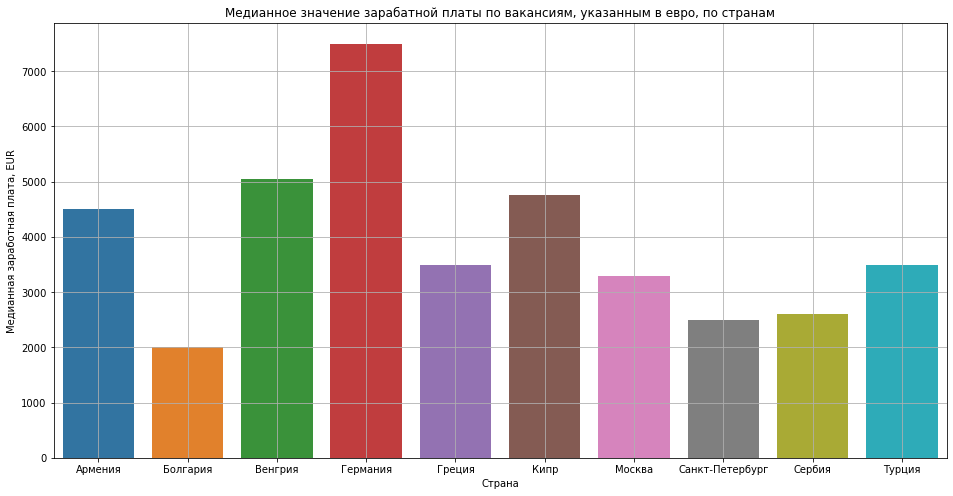

In [253]:
fig = plt.figure(figsize=(16, 8))
multybox = sns.barplot(
    x='city', 
    y="salary_from",
    estimator=sum, 
    errwidth=0, 
    data=euro_df);
multybox.set_title('Медианное значение зарабатной платы по вакансиям, указанным в евро, по странам');
multybox.set_xlabel('Страна');
multybox.set_ylabel('Медианная заработная плата, EUR');
multybox.grid()
plt.show()

In [374]:
usd_df = df[df.salary_currency == 'USD'].groupby(['city'], as_index =False).median()
usd_df.head(5)

,city,salary_from,salary_is_gross,net_sal,employer_is_trusted,"specialization_CTO, CIO, Директор по IT","specialization_FMCG, Товары народного потребления","specialization_PR, Маркетинговые коммуникации",specialization_Web инженер,specialization_Web мастер,specialization_Администратор баз данных,specialization_Аналитик,specialization_Арт директор,specialization_Арт-директор,specialization_Аудит,specialization_Ввод данных,specialization_Гуманитарные науки,specialization_Делопроизводство,"specialization_Дизайн, графика, живопись",specialization_Дизайн/Оформление,specialization_Другое,specialization_Закупки и снабжение,"specialization_Закупки, Снабжение",specialization_Инженер,specialization_Инсталляция и настройка оборудования,specialization_Интернет,specialization_Информационные технологии,"specialization_Информационные технологии, Интернет, Мультимедиа",specialization_Коммерческий банк,specialization_Компьютерная безопасность,specialization_Конструктор,specialization_Контроль качества,specialization_Кредитование малого и среднего бизнеса,specialization_Лаборант,specialization_Машиностроение,specialization_Менеджер по работе с клиентами,specialization_Метролог,specialization_Наладчик,specialization_Наружная реклама,"specialization_Начальный уровень, Мало опыта",specialization_Оператор станков,specialization_Оптовая торговля,specialization_Первичная документация,specialization_Печатная реклама,specialization_Пищевая промышленность,"specialization_Планирование, Размещение рекламы","specialization_Поддержка, Helpdesk",specialization_Преподавание,"specialization_Программирование, Разработка",specialization_Продажи,"specialization_Продвижение, Специальные мероприятия",specialization_Продукты питания,"specialization_Проектирование, Архитектура",specialization_Прямые продажи,specialization_Ресепшен,specialization_Риски: кредитные,specialization_Розничная торговля,specialization_Секретарь,specialization_Сервисный инженер,specialization_Сертификация,specialization_Сетевые технологии,specialization_Системная интеграция,specialization_Системный администратор,specialization_Системы управления предприятием (ERP),specialization_Складское хозяйство,specialization_Стартапы,specialization_Строительство,specialization_Тестирование,specialization_Технический писатель,specialization_Технолог,"specialization_Технолог, Мясо- и птицепереработка","specialization_Технолог, Производство и переработка зерновых","specialization_Технолог, Производство сахара",specialization_Управление закупками,specialization_Управление продажами,specialization_Управление проектами,specialization_Управляющий офисом (Оffice manager),specialization_Химическая промышленность,specialization_Эксплуатация,specialization_Языки,"role_BI-аналитик, аналитик данных",role_Аналитик,"role_Арт-директор, креативный директор",role_Архитектор,role_Аудитор,role_Директор по информационным технологиям (CIO),role_Директор по персоналу (HRD),role_Другое,role_Инженер ПНР,role_Инженер по эксплуатации,"role_Инженер-конструктор, инженер-проектировщик","role_Инженер-электроник, инженер-электронщик",role_Коммерческий директор (CCO),role_Менеджер по закупкам,"role_Менеджер по маркетингу, интернет-маркетолог","role_Менеджер по продажам, менеджер по работе с клиентами",role_Метролог,"role_Научный специалист, исследователь","role_Оператор ПК, оператор базы данных",role_Оператор станков с ЧПУ,role_Операционный директор (COO),role_Офис-менеджер,"role_Программист, разработчик",role_Продуктовый аналитик,role_Руководитель группы разработки,role_Руководитель отдела маркетинга и рекламы,role_Руководитель проектов,role_Системный администратор,role_Системный аналитик,role_Системный инженер,role_Специалист по информационной безопасности,role_Специалист по сертификации,role_Специалист технической поддержки,role_Тестировщик,role_Технический писатель,role_Технолог,"role_Учитель, преподаватель, педагог",skill_.net,skill_18.10.20,skill_1c,skill_2d,skill_3d,skill_abl,skill_account management,skill_active directory,skill_

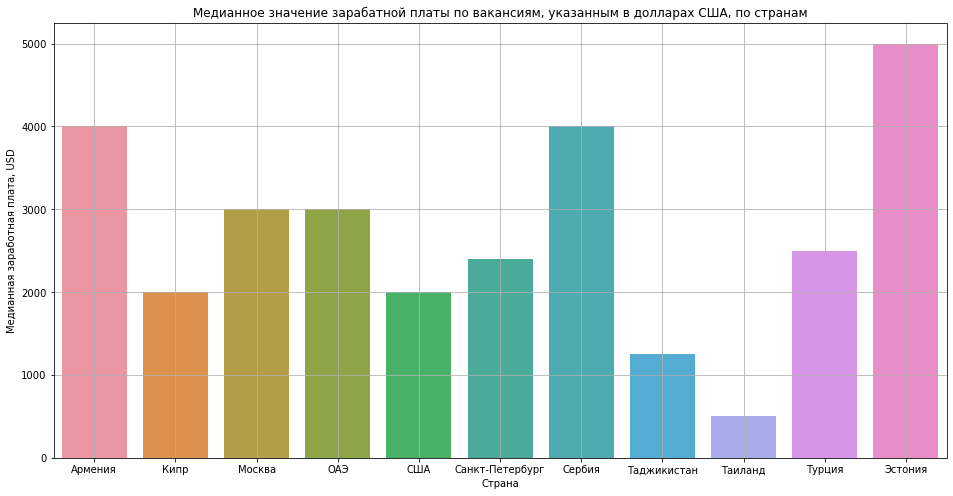

In [376]:
fig = plt.figure(figsize=(16, 8))
multybox = sns.barplot(
    x='city', 
    y="salary_from",
    estimator=sum, 
    errwidth=0, 
    data=usd_df);
multybox.set_title('Медианное значение зарабатной платы по вакансиям, указанным в долларах США, по странам');
multybox.set_xlabel('Страна');
multybox.set_ylabel('Медианная заработная плата, USD');
multybox.grid()
plt.show()

In [377]:
new_df = df[(df['salary_currency'] == 'RUR')]
new_df.head(1)

,name,city,salary_from,salary_currency,salary_is_gross,net_sal,experience,schedule,employment_type,employer_name,employer_is_trusted,"specialization_CTO, CIO, Директор по IT","specialization_FMCG, Товары народного потребления","specialization_PR, Маркетинговые коммуникации",specialization_Web инженер,specialization_Web мастер,specialization_Администратор баз данных,specialization_Аналитик,specialization_Арт директор,specialization_Арт-директор,specialization_Аудит,specialization_Ввод данных,specialization_Гуманитарные науки,specialization_Делопроизводство,"specialization_Дизайн, графика, живопись",specialization_Дизайн/Оформление,specialization_Другое,specialization_Закупки и снабжение,"specialization_Закупки, Снабжение",specialization_Инженер,specialization_Инсталляция и настройка оборудования,specialization_Интернет,specialization_Информационные технологии,"specialization_Информационные технологии, Интернет, Мультимедиа",specialization_Коммерческий банк,specialization_Компьютерная безопасность,specialization_Конструктор,specialization_Контроль качества,specialization_Кредитование малого и среднего бизнеса,specialization_Лаборант,specialization_Машиностроение,specialization_Менеджер по работе с клиентами,specialization_Метролог,specialization_Наладчик,specialization_Наружная реклама,"specialization_Начальный уровень, Мало опыта",specialization_Оператор станков,specialization_Оптовая торговля,specialization_Первичная документация,specialization_Печатная реклама,specialization_Пищевая промышленность,"specialization_Планирование, Размещение рекламы","specialization_Поддержка, Helpdesk",specialization_Преподавание,"specialization_Программирование, Разработка",specialization_Продажи,"specialization_Продвижение, Специальные мероприятия",specialization_Продукты питания,"specialization_Проектирование, Архитектура",specialization_Прямые продажи,specialization_Ресепшен,specialization_Риски: кредитные,specialization_Розничная торговля,specialization_Секретарь,specialization_Сервисный инженер,specialization_Сертификация,specialization_Сетевые технологии,specialization_Системная интеграция,specialization_Системный администратор,specialization_Системы управления предприятием (ERP),specialization_Складское хозяйство,specialization_Стартапы,specialization_Строительство,specialization_Тестирование,specialization_Технический писатель,specialization_Технолог,"specialization_Технолог, Мясо- и птицепереработка","specialization_Технолог, Производство и переработка зерновых","specialization_Технолог, Производство сахара",specialization_Управление закупками,specialization_Управление продажами,specialization_Управление проектами,specialization_Управляющий офисом (Оffice manager),specialization_Химическая промышленность,specialization_Эксплуатация,specialization_Языки,"role_BI-аналитик, аналитик данных",role_Аналитик,"role_Арт-директор, креативный директор",role_Архитектор,role_Аудитор,role_Директор по информационным технологиям (CIO),role_Директор по персоналу (HRD),role_Другое,role_Инженер ПНР,role_Инженер по эксплуатации,"role_Инженер-конструктор, инженер-проектировщик","role_Инженер-электроник, инженер-электронщик",role_Коммерческий директор (CCO),role_Менеджер по закупкам,"role_Менеджер по маркетингу, интернет-маркетолог","role_Менеджер по продажам, менеджер по работе с клиентами",role_Метролог,"role_Научный специалист, исследователь","role_Оператор ПК, оператор базы данных",role_Оператор станков с ЧПУ,role_Операционный директор (COO),role_Офис-менеджер,"role_Программист, разработчик",role_Продуктовый аналитик,role_Руководитель группы разработки,role_Руководитель отдела маркетинга и рекламы,role_Руководитель проектов,role_Системный администратор,role_Системный аналитик,role_Системный инженер,role_Специалист по информационной безопасности,role_Специалист по сертификации,role_Специалист технической поддержки,role_Тестировщик,role_Технический писатель,role_Технолог,"role_Учитель, преподаватель, педагог",skill_.net,skill_18.10.20,skill_1c,skill_2d,sk

In [413]:
new_df['salary_from'].describe()

count      4739.000000
mean     134786.207217
std       63315.823160
min          60.000000
25%       90000.000000
50%      125000.000000
75%      170000.000000
max      500000.000000
Name: salary_from, dtype: float64

In [ ]:
средняя заработная плата составляет 135 тыс. руб. рассмотрим распределение заработной платы

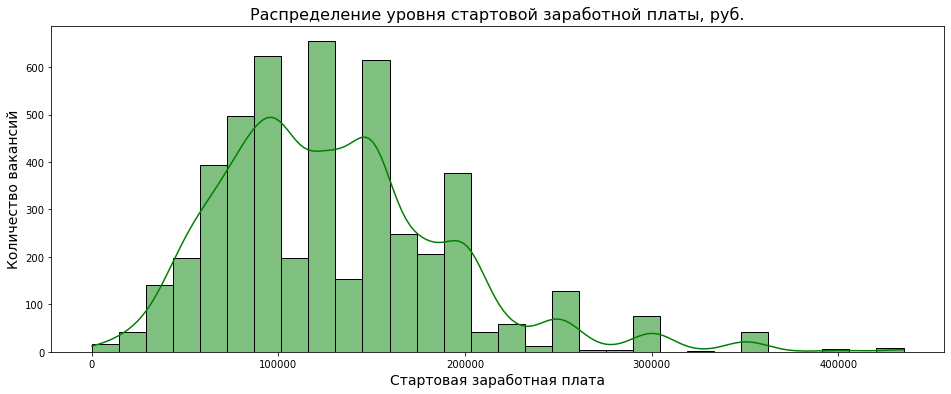

In [378]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.histplot(
    data=new_df, 
    x='net_sal', 
    bins=30,
    color= 'g',
    kde = True)
ax.set_title('Распределение уровня стартовой заработной платы, руб.', fontsize=16)
ax.set_xlabel("Стартовая заработная плата", fontsize=14)
ax.set_ylabel("Количество вакансий", fontsize=14)
plt.show()

В распределении прослеживается 4 моды и резкие впадины, что говорит о том, что существует разрыв между зарплатами в зависимости от опыта. 

In [379]:
new_df.loc[(new_df['experience'] == 'noExperience'), 'experience'] = 'без опыта'
new_df.loc[(new_df['experience'] == 'between1And3'), 'experience'] = '1-3 года'
new_df.loc[(new_df['experience'] == 'between3And6'), 'experience'] = '3-6 лет'
new_df.loc[(new_df['experience'] == 'moreThan6'), 'experience'] = 'более 6 лет'

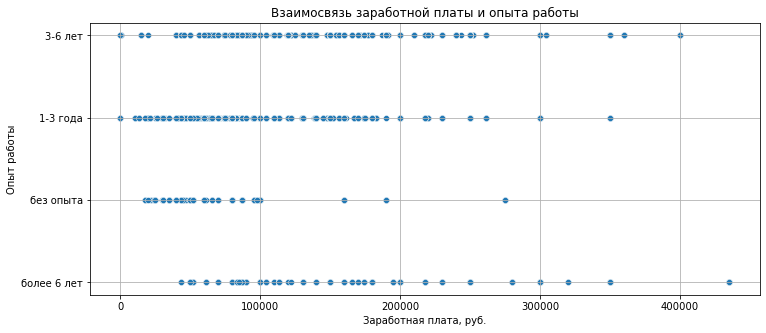

In [502]:
fig = plt.figure(figsize=(12, 5))
sct= sns.scatterplot(
    data=new_df, 
    x="net_sal", 
    y="experience");
sct.set_title('Взаимосвязь заработной платы и опыта работы');
sct.set_xlabel('Заработная плата, руб.');
sct.set_ylabel('Опыт работы');
sct.grid()

более деталное рассмотрение показала, что есть четкая зависимость зарплаты от опыта работы. найдем среднюю зарплаты для каждого сегмента опыта.

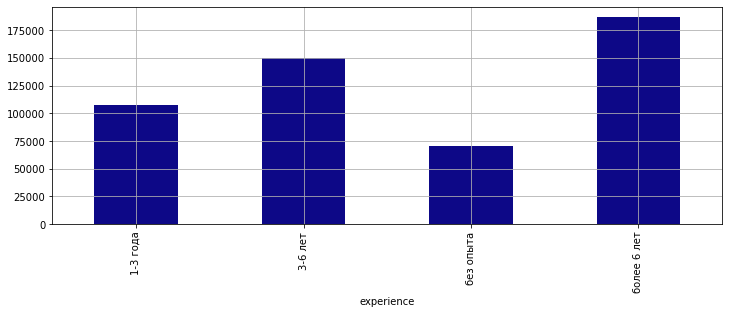

In [407]:
exp_salary=new_df.groupby(['experience'])['net_sal'].mean()
fig=plt.figure(figsize=(10,7))
exp_salary.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

рассмотрим, специалисты какого уровня востребованы на рынке

In [382]:
new_df['experience'].value_counts(normalize=True)

3-6 лет        0.479426
1-3 года       0.442076
более 6 лет    0.044524
без опыта      0.033973
Name: experience, dtype: float64

наиболее высотребованы специасты с опытом от 1 до 6 лет. Вакансии для высококвалифиированных специалистов в рублевом сегменте составляют всего 4,5%

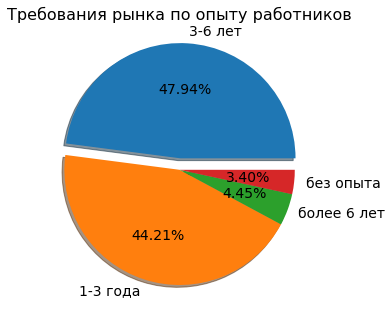

In [383]:
experience_comb = new_df['experience'].value_counts()
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    experience_comb,
    labels=experience_comb.index,
    autopct='%.2f%%',
    textprops={'fontsize': 14},
    shadow=True,
    explode = [0.1, 0, 0, 0]
    )
axes.set_title('Требования рынка по опыту работников', fontsize=16);

рассмотрим распеределение вакансий по регионам, в зависимости от опыта работы. опытные работники востребованы в Москве, Владивостоке и Санкт-Петербурге. Специалисты с опытом 3-6 лет очень востребованы в Армении. Специалисты без опыта или с начальным опытом восстербваны в Москве.

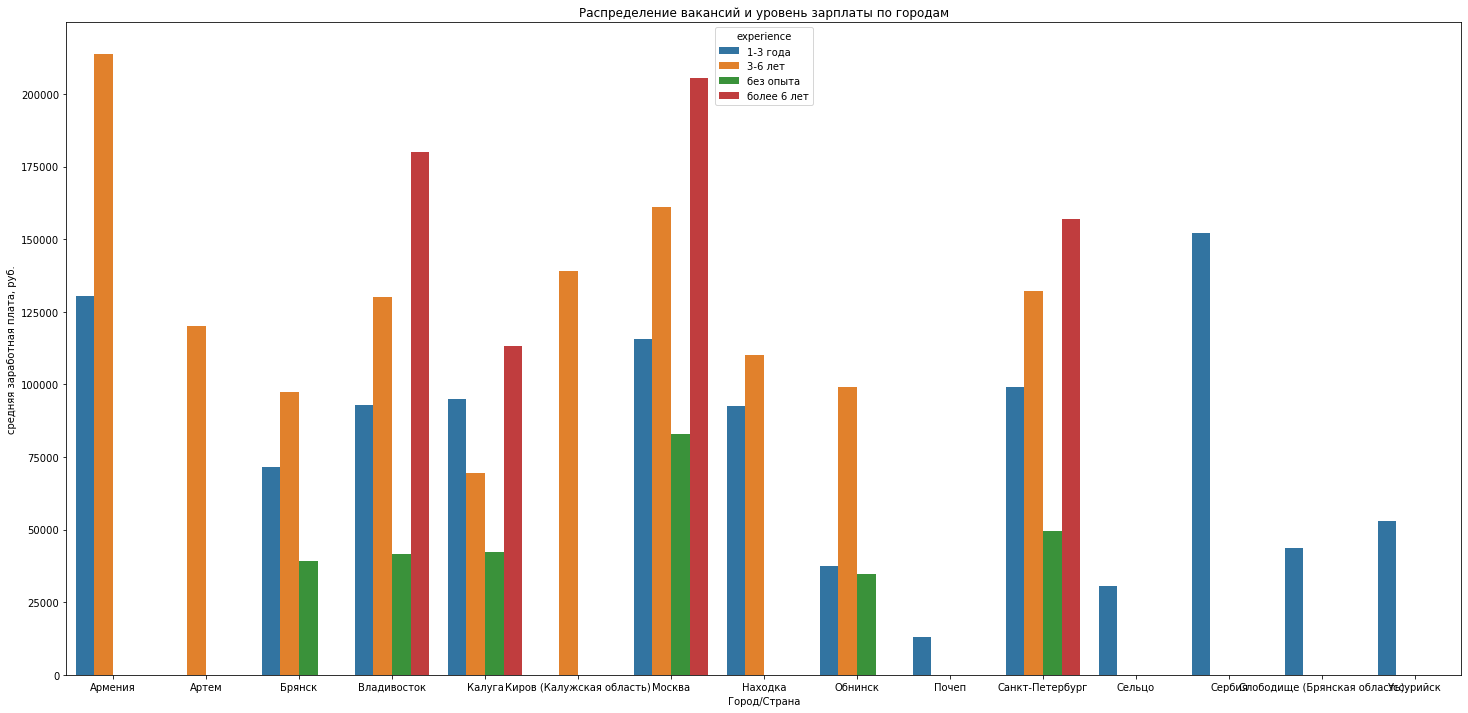

In [404]:
region_df = new_df.groupby(['city', 'experience'], as_index =False)['net_sal'].mean()
fig = plt.figure(figsize=(25, 12))
barplot = sns.barplot(
    data=region_df,
    x='city',
    y='net_sal',
    hue='experience')
barplot.set_title('Распределение вакансий и уровень зарплаты по городам');
barplot.set_xlabel('Город/Страна');
barplot.set_ylabel('средняя заработная плата, руб.');

Рассмотрим зависимость заработной платы от предлагаемой занятости. Наибольшая зарплата при полной занятости, частичная и полектная занятость уступают.

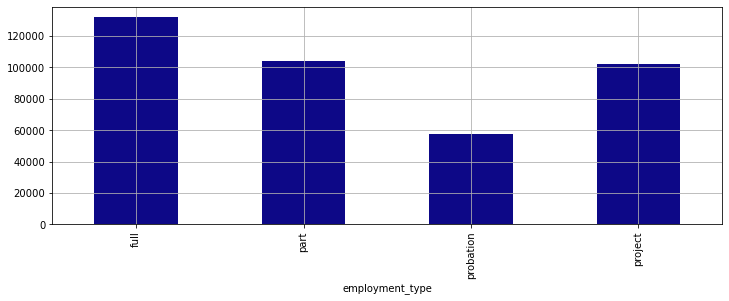

In [503]:
format_salary=new_df.groupby(['employment_type'])['net_sal'].mean()
fig=plt.figure(figsize=(10,7))
format_salary.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);


In [ ]:
Рассмотрим распределение стартовой зарплаты в разрезе формата работы

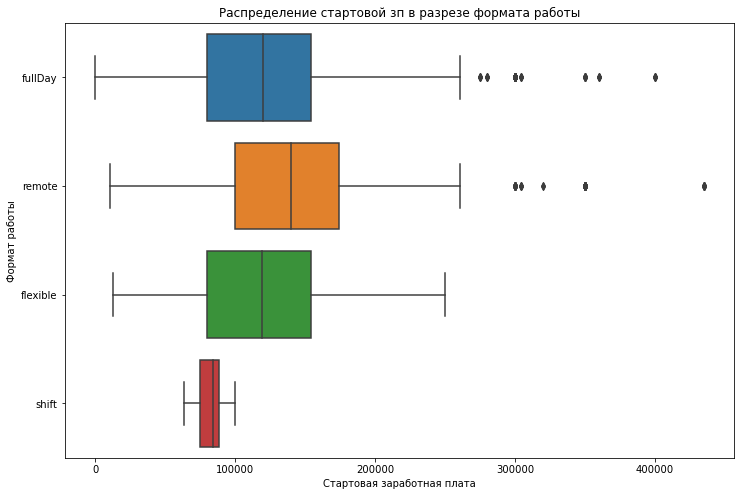

In [412]:
fig=plt.figure(figsize=(12,8))
boxplot=sns.boxplot(data=new_df, x='net_sal', y='schedule', orient='h')
boxplot.set_title('Распределение стартовой зп в разрезе формата работы')
boxplot.set_xlabel('Стартовая заработная плата')
boxplot.set_ylabel('Формат работы');

при полном посещении офиса и шибком графике медианные значения зарплаты практически идентичны, при удаленном зарплата выше. сменая работа очень узкосегментирована.

рассмотрим наиболее востребованные навыки, скилы и специалисзации.

In [ ]:
def count_values(df, what:int):
    wt = {1: "specialization", 2: "role", 3: "skill"}
    for k,v in df[[x for x in df if wt[what] in x]].sum().sort_values(ascending=False).to_dict().items():
        print(v, "---", k) 

    return None

def get_columns(df, what:int, how_many:int):
    wt = {1: "specialization", 2: "role", 3: "skill"}
    clms = df[[x for x in df if wt[what] in x]].sum().sort_values(ascending=False).iloc[how_many:].index
    df = df.drop(clms, axis=1)
    
    return df

In [473]:
role_df=get_columns(new_df,2,10)
#role_df.head(5)

In [474]:
role = count_values(role_df, 2)

4078 --- role_Программист, разработчик
167 --- role_Другое
100 --- role_Инженер-конструктор, инженер-проектировщик
85 --- role_Оператор станков с ЧПУ
48 --- role_Технолог
34 --- role_Менеджер по продажам, менеджер по работе с клиентами
33 --- role_Инженер-электроник, инженер-электронщик
29 --- role_Руководитель группы разработки
25 --- role_Научный специалист, исследователь
14 --- role_Учитель, преподаватель, педагог


In [475]:
details = {
    'Role' : ['Программист_разработчик', 'Другое', 'Инженер-конструктор', 'Оператор станков ЧПУ', 'Технолог', 'Менеджер по продажам', 'Инженер-электоник'],
    'Vacancy' : [4078, 167, 100, 85, 48,34,33],
}
  

role_df = pd.DataFrame(details, columns = ['Role', 'Vacancy'])
  
role_df

,Role,Vacancy
0,Программист_разработчик,4078
1,Другое,167
2,Инженер-конструктор,100
3,Оператор станков ЧПУ,85
4,Технолог,48
5,Менеджер по продажам,34
6,Инженер-электоник,33


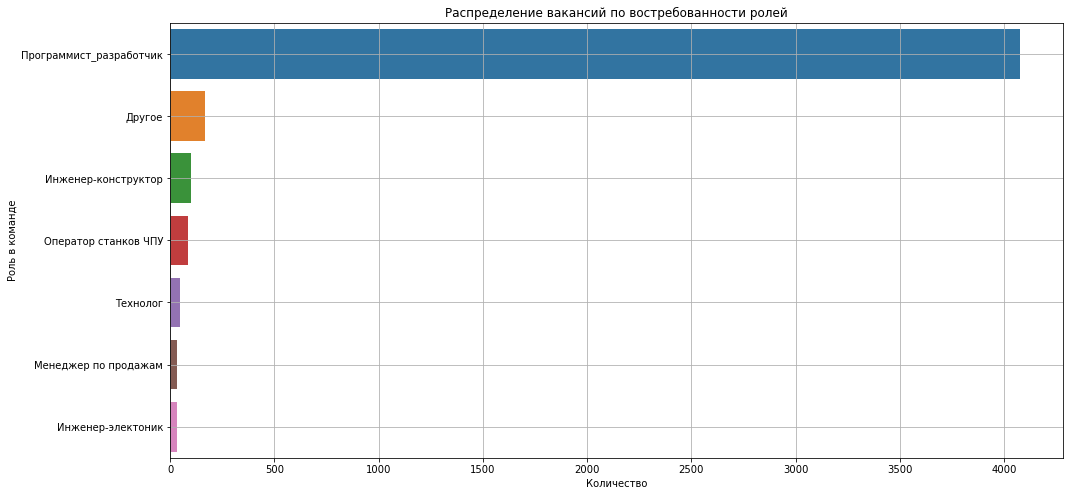

In [476]:
fig = plt.figure(figsize=(16, 8))
multybox = sns.barplot(
    x='Vacancy', 
    y="Role",
    estimator=sum, 
    errwidth=0, 
    data=role_df);
multybox.set_title('Распределение вакансий по востребованности ролей');
multybox.set_xlabel('Количество');
multybox.set_ylabel('Роль в команде');
multybox.grid()
plt.show()

In [477]:
spez_df=get_columns(new_df,1,10)

In [478]:
spez = count_values(spez_df, 1)

4364 --- specialization_Инженер
4095 --- specialization_Программирование, Разработка
4080 --- specialization_Системы управления предприятием (ERP)
4065 --- specialization_Web инженер
4065 --- specialization_Web мастер
201 --- specialization_Менеджер по работе с клиентами
201 --- specialization_Прямые продажи
183 --- specialization_Начальный уровень, Мало опыта
172 --- specialization_Продажи
167 --- specialization_Розничная торговля


In [480]:
details1 = {
    'Spez' : ['Инженер', 'Программирование, Разработка', 'Системы управления (ERP)', 'Web мнженер', 'Web мастер', 'Менеджер по работе с клиентами', 'Прямые продажи'],
    'Vacancy' : [4364, 4095, 4080, 4065, 4065,201,201],
}
  

spezial_df = pd.DataFrame(details1, columns = ['Spez', 'Vacancy'])
  
spezial_df

,Spez,Vacancy
0,Инженер,4364
1,"Программирование, Разработка",4095
2,Системы управления (ERP),4080
3,Web мнженер,4065
4,Web мастер,4065
5,Менеджер по работе с клиентами,201
6,Прямые продажи,201


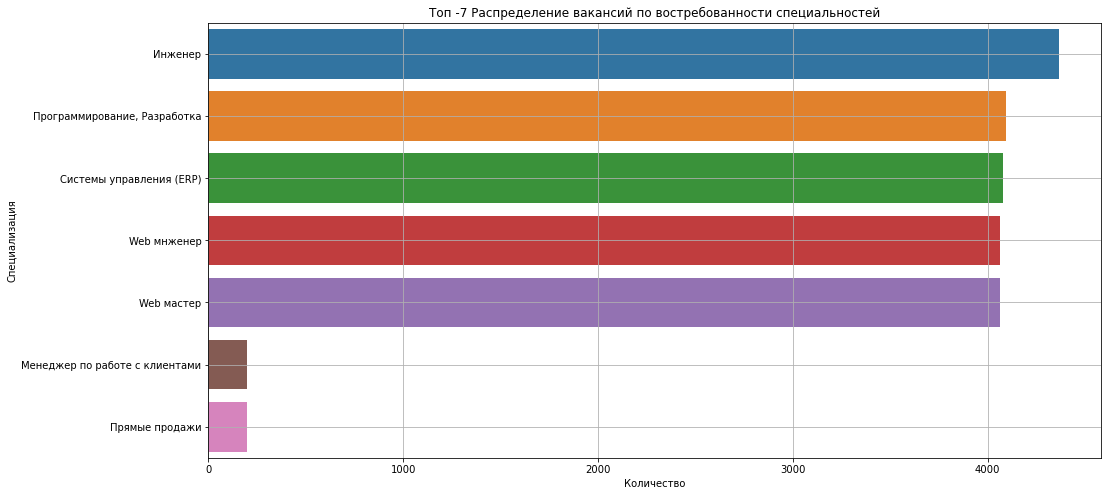

In [483]:
fig = plt.figure(figsize=(16, 8))
multybox = sns.barplot(
    x='Vacancy', 
    y="Spez",
    estimator=sum, 
    errwidth=0, 
    data=spezial_df);
multybox.set_title('Топ -7 Распределение вакансий по востребованности специальностей');
multybox.set_xlabel('Количество');
multybox.set_ylabel('Специализация');
multybox.grid()
plt.show()

In [497]:
skill_df=get_columns(new_df,3,35)

In [498]:
skill = count_values(skill_df, 3)

1454 --- skill_sql
1288 --- skill_1c
1040 --- skill_git
673 --- skill_javascript
619 --- skill_php
596 --- skill_linux
511 --- skill_html
502 --- skill_c++
481 --- skill_ооп
383 --- skill_css
366 --- skill_работа с базами данных
339 --- skill_english
330 --- skill_python
243 --- skill_c#
194 --- skill_typescript
187 --- skill_java
186 --- skill_docker
182 --- skill_.net
180 --- skill_jquery
180 --- skill_react
168 --- skill_xml
164 --- skill_qt
162 --- skill_rest
153 --- skill_nodejs
148 --- skill_laravel
148 --- skill_умение работать в условиях многозадачности
138 --- skill_работа в команде
128 --- skill_redis
127 --- skill_vue.js
112 --- skill_rabbitmq
108 --- skill_разработка документации
106 --- skill_mongodb
94 --- skill_разработка по
90 --- skill_api
86 --- skill_удаленная работа


In [490]:
details2 = {
    'Skill' : ['SQL', '1C', 'GIT', 'JAVASCRIPT', 'PHP', 'LINUX', 'HTML', 'C++', 'ООП', 'CSS'],
    'Vacancy' : [1454, 1288, 1040, 673, 619, 596,511,502,481,393],
}
  

skills_df = pd.DataFrame(details2, columns = ['Skill', 'Vacancy'])
  
skills_df

,Skill,Vacancy
0,SQL,1454
1,1C,1288
2,GIT,1040
3,JAVASCRIPT,673
4,PHP,619
5,LINUX,596
6,HTML,511
7,C++,502
8,ООП,481
9,CSS,393


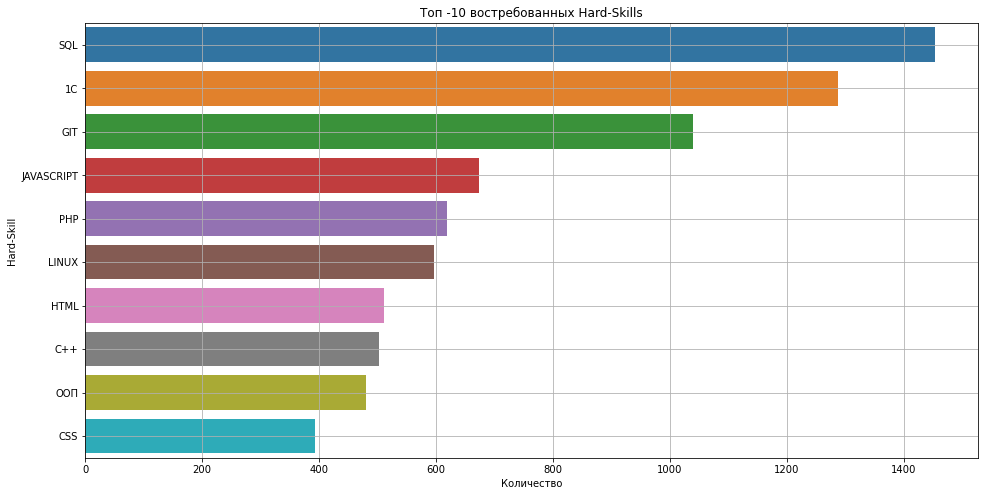

In [492]:
fig = plt.figure(figsize=(16, 8))
multybox = sns.barplot(
    x='Vacancy', 
    y="Skill",
    estimator=sum, 
    errwidth=0, 
    data=skills_df);
multybox.set_title('Топ -10 востребованных Hard-Skills');
multybox.set_xlabel('Количество');
multybox.set_ylabel('Hard-Skill');
multybox.grid()
plt.show()

In [499]:
details3 = {
    'Soft-Skill' : ['English', 'Умение работать в условиях многозадачности', 'Работа в команде'],
    'Vacancy' : [339, 148, 138],
}
  

sskills_df = pd.DataFrame(details3, columns = ['Soft-Skill', 'Vacancy'])
  
sskills_df

,Soft-Skill,Vacancy
0,English,339
1,Умение работать в условиях многозадачности,148
2,Работа в команде,138


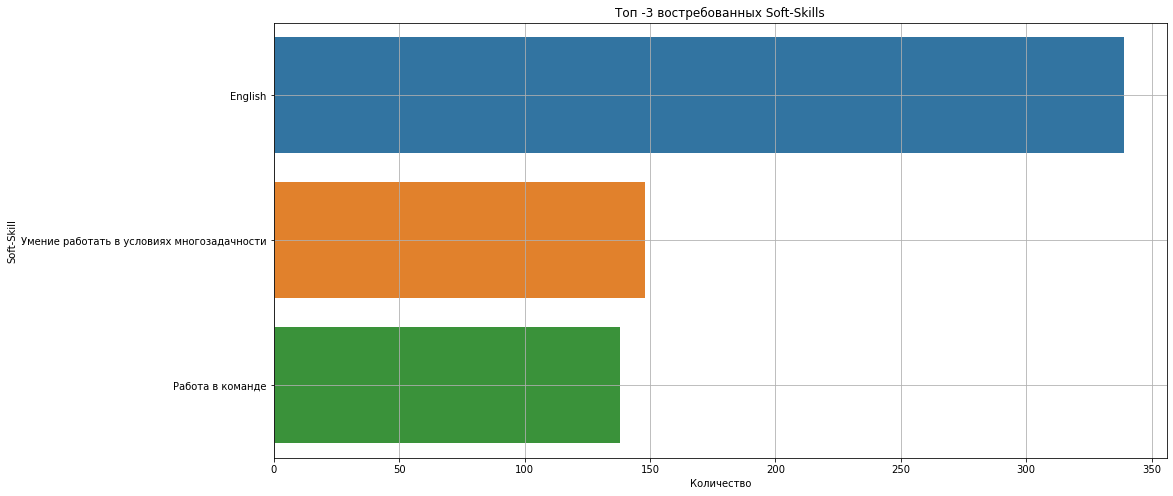

In [500]:
fig = plt.figure(figsize=(16, 8))
multybox = sns.barplot(
    x='Vacancy', 
    y="Soft-Skill",
    estimator=sum, 
    errwidth=0, 
    data=sskills_df);
multybox.set_title('Топ -3 востребованных Soft-Skills');
multybox.set_xlabel('Количество');
multybox.set_ylabel('Soft-Skill');
multybox.grid()
plt.show()

Вывод: на рынке востребованы специалисты среднего и чуть выше среднего уровня. Работодадель готов рассматривать условия полному рабочему дню в офиме и гибриному графику. для рынка характерно скачкообразное изменение зарплаты ри достижении уровня опыта.
    